In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.utils import shuffle

import tensorflow as tf
Model = tf.keras.models.Model
Layers = tf.keras.layers
Input, Embedding = Layers.Input, Layers.Embedding
Dot, Add, Flatten = Layers.Dot, Layers.Add, Layers.Flatten
l2 = tf.keras.regularizers.l2
SGD, Adam = tf.keras.optimizers.SGD, tf.keras.optimizers.Adam

## Load Data

In [7]:
df = pd.read_csv('../../data/movielens/edited_rating.csv')

In [8]:
N = df.userId.max() + 1
M = df.movie_idx.max() + 1

## Create Train/Test

In [10]:
df = shuffle(df)
cutoff = int(0.8 * len(df))
df_train = df.iloc[:cutoff]
df_test = df.iloc[cutoff:]

## Initialize Params

In [11]:
K = 10
mu = df_train.rating.mean()
epochs = 25
reg_penalty = 0

## Define Model

In [16]:
# user and movie inputs (batchsize, 1)
u = Input(shape=(1,))
m = Input(shape=(1,))

# user embedding (N, 1, K) and movie embedding (M, 1, K)
u_embedding = Embedding(N, K, embeddings_regularizer=l2(reg_penalty))(u)
m_embedding = Embedding(M, K, embeddings_regularizer=l2(reg_penalty))(m)

# representing bias terms with embeddings
u_bias = Embedding(N, 1, embeddings_regularizer=l2(reg_penalty))(u)
m_bias = Embedding(M, 1, embeddings_regularizer=l2(reg_penalty))(m)
x = Dot(axes=2)([u_embedding, m_embedding])

x = Add()([x, u_bias, m_bias])
x = Flatten()(x)

model = Model(inputs=[u, m], outputs=x)
model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_7 (InputLayer)            (None, 1)            0                                            
__________________________________________________________________________________________________
input_8 (InputLayer)            (None, 1)            0                                            
__________________________________________________________________________________________________
embedding_6 (Embedding)         (None, 1, 10)        1384930     input_7[0][0]                    
__________________________________________________________________________________________________
embedding_7 (Embedding)         (None, 1, 10)        267440      input_8[0][0]                    
__________________________________________________________________________________________________
dot_1 (Dot

## Compile Model

In [17]:
model.compile(
    loss='mse',
    optimizer=SGD(lr=0.01, momentum=0.9),
    metrics=['mse']
)

## Train Model

In [19]:
r = model.fit(
    x=[df_train.userId.values, df_train.movie_idx.values],
    y=df_train.rating.values - mu,
    epochs=epochs,
    batch_size=128,
    validation_data=(
        [df_test.userId.values, df_test.movie_idx.values],
        df_test.rating.values - mu
    )
)

/Users/jujohnson/anaconda3/envs/tf.latest/lib/python3.6/site-packages/tensorflow/python/ops/gradients_impl.py:108: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 16000210 samples, validate on 4000053 samples
Epoch 1/25
16000210/16000210 [==============================] - 1054s 66us/step - loss: 1.5742 - mean_squared_error: 1.5742 - val_loss: 1.0162 - val_mean_squared_error: 1.0162
Epoch 2/25
16000210/16000210 [==============================] - 1153s 72us/step - loss: 0.9383 - mean_squared_error: 0.9383 - val_loss: 0.8948 - val_mean_squared_error: 0.8948
Epoch 3/25
16000210/16000210 [==============================] - 1079s 67us/step - loss: 0.8592 - mean_squared_error: 0.8592 - val_loss: 0.8460 - val_mean_squared_error: 0.8460
Epoch 4/25
16000210/16000210 [==============================] - 989s 62us/step - loss: 0.8213 - mean_squared_error: 0.8213 - val_loss: 0.8193 - val_mean_squared_error: 0.8193
Epoch 5/25
16000210/16000210 [==============================] - 1008s 63us/step - loss: 0.7986 - mean_squared_error: 0.7986 - val_loss: 0.8023 - val_mean_squared_error: 0.8023
Epoch 6/25
16000210/16000210 [==============================] - 10

## Plot Results

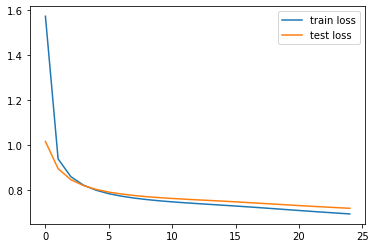

In [20]:
# plot loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='test loss')
plt.legend()
plt.show()

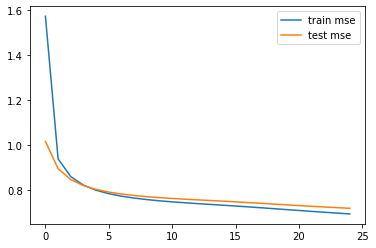

In [21]:
# plot mse
plt.plot(r.history['mean_squared_error'], label='train mse')
plt.plot(r.history['val_mean_squared_error'], label='test mse')
plt.legend()
plt.show()